In [ ]:
#If we think Ns is directly related to N-nitrate from Commercial Fertilizer

https://towardsdatascience.com/interactive-data-analysis-with-dropdown-menu-ipywidgets-and-plotly-in-jupyter-notebook-591a84a81b22

https://www.oreilly.com/library/view/learning-jupyter-5/9781789137408/dbcbef4f-d72b-4f61-b656-0e33dee10396.xhtml

https://ipywidgets.readthedocs.io/en/7.6.5/examples/Using%20Interact.html

### 0. Libraries

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
sns.set()
import re

import textwrap

import IPython.display
from IPython.display import display, clear_output
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

import plotly.graph_objects as go

### 1. Get data

In [2]:
df_ifew = pd.read_csv('NRS_IFEWs.csv')
df_pract = pd.read_csv('NRS_py_conservation.csv')

In [3]:
df_pract

Practice  \
0                      Timing   
1                      Timing   
2                      Timing   
3                      Timing   
4                      Source   
5                      Source   
6   Nitrogen Application Rate   
7     Nitrification Inhibitor   
8                 Cover Crops   
9                 Cover Crops   
10             Living Mulches   
11              Edge-of-Field   
12              Edge-of-Field   
13              Edge-of-Field   
14              Edge-of-Field   
15              Edge-of-Field   
16                  Perennial   
17                  Perennial   
18         Extended Rotations   
19            Grazed Pastures   

                                           Names List  \
0   Moving from Fall to  Spring Pre-plant Application   
1   Spring pre-plant/sidedress 40-60 split Compare...   
2      Sidedress - Compared to  Pre-plant Application   
3   Sidedress - Soil Test Based Compared to Pre-plant   
4   Liquid Swine Manure Compared to Spring-Applied...   
5   Poultry Manure Compared to Spring Applied Fert...   
6   Reduce to  Maximum Return to Nitrogen value 14...   
7   Nitrapyrin in Fall - Compared to Fall- Applied...   
8                                                 Rye   
9                                                 Oat   
10  e.g. Kura clover - Nitrate-N reduction from on...   
11                                        Bioreactors   
12                               Drainage Water Mgmt.   
13                                   Shallow Drainage   
14                                           Wetlands   
15                                           Buffers    
16  Energy Crops - Compared to Spring-Applied Fert...   
17  Land Retirement (CRP) -Compared to Spring- App...   
18  At least 2 years of alfalfa in a 4 or  5 year ...   
19  No pertinent information from Iowa -assume sim...   

                                             Comments  \
0   Moving from Fall to  Spring Pre-plant Application   
1   Spring pre-plant/sidedress 40-60 split Compare...   
2      Sidedress - Compared to  Pre-plant Application   
3   Sidedress - Soil Test Based Compared to Pre-plant   
4   Liquid Swine Manure Compared to Spring-Applied...   
5   Poultry Manure Compared to Spring Applied Fert...   
6   Reduce to  Maximum Return to Nitrogen value 14...   
7   Nitrapyrin in Fall - Compared to Fall- Applied...   
8                                                 Rye   
9                                                 Oat   
10  e.g. Kura clover - Nitrate-N reduction from on...   
11                                        Bioreactors   
12                         No impact on concentration   
13                         No impact on concentration   
14                             Targeted Water Quality   
15  Only for  water than interacts with the active...   
16  Energy Crops - Compared to Spring-Applied Fert...   
17  Land Retirement (CRP) -Compared to Spring- App...   
18  At least 2 years of alfalfa in a 4 or  5 year ...   
19  No pertinent information from Iowa -assume sim...   

    % AVG Nitrate-N Reduction+ % Corn Yield Change++  
0                            6                     4  
1                            5                    10  
2                            7                     0  
3                            4                    13  
4                            4                     0  
5                           -3                    -2  
6                           10                    -1  
7                            9                     6  
8                           31                    -6  
9                           28                    -5  
10                          41                    -9  
11                          43                     0  
12                          33                     -  
13                          32                     -  
14                          52                     -  
15                          91                     

### 2. Organize data format

In [4]:
# No need of silage values
df_ifew = df_ifew.drop(['CornSilageAcresHarvested','CornSilageYield_tonspacre'], axis = 1)

# Deal with Nan values
df_ifew.isna().sum()

CountyName                  0
BeefCows                    0
Hogs                        0
MilkCows                    0
OtherCattle                 0
CornAcresPlanted           25
CornGrainAcresHarvested    25
CornGrainYield_bupacre     25
SoybeansAcresHarvested     33
SoybeansAcresPlanted       33
SoybeansYield_bupacre      33
Year                        0
CommercialN_kg_ha           0
ManureN_kg_ha               0
GrainN_kg_ha                0
GrainN_neg_kg_ha            0
FixatedN_kg_ha              0
NitrogenSurplus_kg_ha       0
dtype: int64

In [5]:
# Calculate based on other around year values
df_ifew = df_ifew.fillna(method = "bfill")

# Deal with Nan values
df_ifew.isna().sum()

CountyName                 0
BeefCows                   0
Hogs                       0
MilkCows                   0
OtherCattle                0
CornAcresPlanted           0
CornGrainAcresHarvested    0
CornGrainYield_bupacre     0
SoybeansAcresHarvested     0
SoybeansAcresPlanted       0
SoybeansYield_bupacre      0
Year                       0
CommercialN_kg_ha          0
ManureN_kg_ha              0
GrainN_kg_ha               0
GrainN_neg_kg_ha           0
FixatedN_kg_ha             0
NitrogenSurplus_kg_ha      0
dtype: int64

In [6]:
# convert the 'Date' column to datetime format
df_ifew['Year']= pd.to_datetime(df_ifew['Year'])
df_ifew['Year'] = df_ifew['Year'].dt.year

In [7]:
# Create dropdown lists
y_lst = (df_ifew['Year'].unique()).tolist() #year
r_lst = ((df_ifew['CountyName'].unique()).tolist()) # region
r_lst.sort() # alphabeticallly
r_lst.insert(0,'Iowa')
p_lst = (df_pract['Names List']).tolist() #practice
len(r_lst)

100

In [180]:
# Create a function takes the info on the dropdown lists (year, chosen region) and calculates the Nitrogen surplus based on the chosen practice.

def n_ifew(selectedYear, df_ifew, selectedRegion, practice, df_pract, perc):
    # create an Empty DataFrame object
    new_ifew = pd.DataFrame(index=range(3),columns=range(6))
    # Change the column names
    new_ifew.columns = ['Old', 'New', 'Max', 'Min', 'Pl', 'Helper']
    # Change the row indexes
    new_ifew.index = ['Total Nitrogen Load [tons]', 'Corn [bushels]', 'Total Area']
        
    # Year selection
    yr = selectedYear
    df_y = df_ifew.loc[df_ifew['Year'] == yr]
    
    # Region Selection
    r = selectedRegion
    df = df_y
    if (r == 'Iowa'):
        df_r = df
    else:
        df_r = df[df['CountyName'] == r]
        
    # WHAT IF ACCOUNT FOR MULTIPLE PRACTICES?
    nr_change = df_pract.loc[df_pract['Names List']==practice,'% AVG Nitrate-N Reduction+'].item()
    cy_change = df_pract.loc[df_pract['Names List']==practice,'% Corn Yield Change++']  
    
    
    #calculate values produced by query
    if (r == 'Iowa'):
        Ns = df_r['NitrogenSurplus_kg_ha'].sum()
        Cy = df_r['CornGrainYield_bupacre'].sum()
        Nnew = Ns-((int(nr_change)/100)*Ns)
        Cnew = Cy+((int(cy_change)/100)*Cy)
    else:
        Ns = df_r['NitrogenSurplus_kg_ha']
        Cy = df_r['CornGrainYield_bupacre']
        Nnew = Ns-((int(nr_change)/100)*Ns)
        Cnew = Cy+((int(cy_change)/100)*Cy)
        
    a = Nnew
    b = Cnew  
    
    
    # total area in hectares
    total_area = (df_r['CornAcresPlanted']+ df_r['SoybeansAcresPlanted'])/2.57
    # Nitrogen Load Old in metric tons
    new_ifew['Old']['Total Nitrogen Load [tons]'] = int(float(total_area*df_r['NitrogenSurplus_kg_ha']/1000))
    # Nitrogen Load New in metric tons
    new_ifew['New']['Total Nitrogen Load [tons]'] = int(float(total_area*a/1000))
    # Corn yield Old in bushels
    new_ifew['Old']['Corn [bushels]'] = int(float((df_r['CornAcresPlanted'])*df_r['CornGrainYield_bupacre']))
    # Corn Yield New
    new_ifew['New']['Corn [bushels]'] = int(float((df_r['CornAcresPlanted'])*b))
    #percentage Old
    new_ifew['Old']['Total Area'] = 100 
    
    # percentage area
    new_ifew['New']['Total Area'] = perc
    
    # Max column for plotting purposes
    new_ifew['Max']['Total Nitrogen Load [tons]'] = max(new_ifew['Old']['Total Nitrogen Load [tons]'],new_ifew['New']['Total Nitrogen Load [tons]'])
    new_ifew['Max']['Corn [bushels]'] = max(new_ifew['Old']['Corn [bushels]'], new_ifew['New']['Corn [bushels]'])
    new_ifew['Max']['Total Area'] = max(new_ifew['Old']['Total Area'],new_ifew['New']['Total Area'])
    
    # Min column for plotting purposes
    new_ifew['Min']['Total Nitrogen Load [tons]'] = min(new_ifew['Old']['Total Nitrogen Load [tons]'],new_ifew['New']['Total Nitrogen Load [tons]'])
    new_ifew['Min']['Corn [bushels]'] = min(new_ifew['Old']['Corn [bushels]'], new_ifew['New']['Corn [bushels]'])
    new_ifew['Min']['Total Area'] = min(new_ifew['Old']['Total Area'],new_ifew['New']['Total Area'])
    
    new_ifew['Pl']['Total Nitrogen Load [tons]'] = round(min(new_ifew['Old']['Total Nitrogen Load [tons]'],new_ifew['New']['Total Nitrogen Load [tons]'])/max(new_ifew['Old']['Total Nitrogen Load [tons]'],new_ifew['New']['Total Nitrogen Load [tons]']),2)
    new_ifew['Pl']['Corn [bushels]'] = round(min(new_ifew['Old']['Corn [bushels]'], new_ifew['New']['Corn [bushels]'])/max(new_ifew['Old']['Corn [bushels]'], new_ifew['New']['Corn [bushels]']),2)
    new_ifew['Pl']['Total Area'] = round(min(new_ifew['Old']['Total Area'],new_ifew['New']['Total Area'])/max(new_ifew['Old']['Total Area'],new_ifew['New']['Total Area']),2)
    
    new_ifew['Helper']['Total Nitrogen Load [tons]'] = 1-new_ifew['Pl']['Total Nitrogen Load [tons]']
    new_ifew['Helper']['Corn [bushels]'] = 1-new_ifew['Pl']['Corn [bushels]']
    new_ifew['Helper']['Total Area'] = 1-new_ifew['Pl']['Total Area']
    
    
    return new_ifew

In [181]:
trial = (n_ifew(2015, df_ifew, 'Monroe', 'Moving from Fall to  Spring Pre-plant Application', df_pract, 50))

In [183]:
df_ifew

CountyName  BeefCows   Hogs  MilkCows  OtherCattle  CornAcresPlanted  \
0       Monroe         0  11760         0        16349           32300.0   
1       Monroe         0  17641         0        16566           30000.0   
2       Monroe         0  23521         0        16782           30000.0   
3       Monroe         0  29401         0        16998           30700.0   
4       Monroe         0  35281         0        17214           28000.0   
..         ...       ...    ...       ...          ...               ...   
589      Adair         0  46126         0        25163          112000.0   
590      Adair         0  49370         0        26142          115000.0   
591      Adair         0  52615         0        27120          108500.0   
592      Adair         0  55860         0        28098          108500.0   
593      Adair         0  59104         0        29077          111500.0   

     CornGrainAcresHarvested  CornGrainYield_bupacre  SoybeansAcresHarvested  \
0                    31200.0                   175.7                 33200.0   
1                    28100.0                   180.0                 33100.0   
2                    28100.0                   180.0                 33100.0   
3                    28400.0                   169.9                 28900.0   
4                    26000.0                   167.0                 30500.0   
..                       ...                     ...                     ...   
589                 107400.0                   176.5                106100.0   
590                 113800.0                   190.3                106700.0   
591                 104100.0                   175.2                109900.0   
592                 103100.0                   149.5                105700.0   
593                 107300.0                   176.6                100900.0   

     SoybeansAcresPlanted  SoybeansYield_bupacre  Year  CommercialN_kg_ha  \
0                 33600.0                   48.9  2014              93.62   
1                 33200.0                   57.3  2015              33.82   
2                 33200.0                   57.3  2016              34.82   
3                 29100.0                   51.0  2017              35.09   
4                 30900.0                   50.4  2018              33.45   
..                    ...                    ...   ...                ...   
589              106500.0                   55.1  2015              70.50   
590              107000.0                   59.3  2016              74.67   
591              110500.0                   50.5  2017              75.89   
592              106500.0                   50.1  2018              69.08   
593              101500.0                   53.3  2019              69.82   

     ManureN_kg_ha  GrainN_kg_ha  GrainN_neg_kg_ha  FixatedN_kg_ha  \
0            26.04        171.55           -171.55           84.58   
1             0.00          0.00              0.00            0.00   
2            32.29        194.60           -194.60          111.00   
3            36.83        173.08           -173.08           86.25   
4            40.15        174.02           -174.02           91.28   
..             ...           ...               ...             ...   
589          15.21        183.62           -183.62           97.19   
590          15.71        196.25           -196.25          107.06   
591          16.68        174.75           -174.75           88.07   
592          17.76        163.83           -163.83           85.39   
593          18.70        178.59           -178.59           90.39   

     NitrogenSurplus_kg_ha  
0                     32.7  
1                     33.8  
2                    -16.5  
3                    -14.9  
4                     -9.1  
..                     ...  
589                   -0.7  
590                    1.2  
591                    5.9  
592                    8.4  
593                    0.3  

[594 rows x 18 

In [182]:
trial

Old      New      Max      Min    Pl Helper
Total Nitrogen Load [tons]      831      781      831      781  0.94   0.06
Corn [bushels]              5400000  5616000  5616000  5400000  0.96   0.04
Total Area                      100       50      100       50   0.5    0.5

Rectangle(xy=(0, -0.25), width=0.94, height=0.5, angle=0)
0.0
-0.25
Rectangle(xy=(0, 0.75), width=0.96, height=0.5, angle=0)
0.0
0.75
Rectangle(xy=(0, 1.75), width=0.5, height=0.5, angle=0)
0.0
1.75
Rectangle(xy=(0.94, -0.25), width=0.06, height=0.5, angle=0)
0.94
-0.25
Rectangle(xy=(0.96, 0.75), width=0.04, height=0.5, angle=0)
0.96
0.75
Rectangle(xy=(0.5, 1.75), width=0.5, height=0.5, angle=0)
0.5
1.75


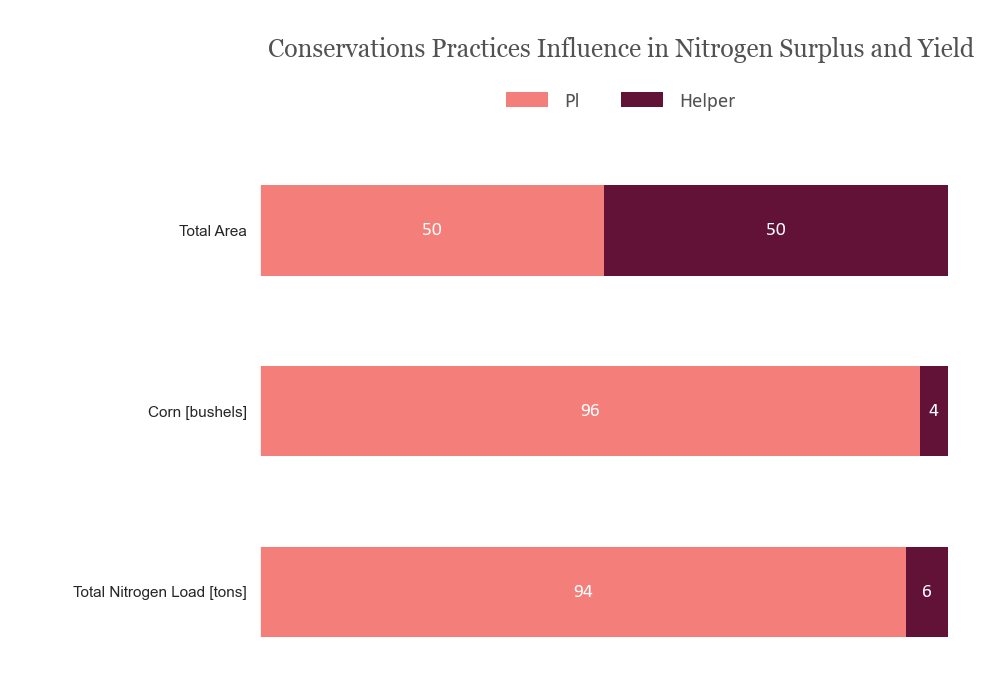

In [184]:
# plot function
# Plot default data
# Create plot
font_color = '#525252'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
colors = ['#f47e7a','#621237']

ax = trial.iloc[:,4:6].plot.barh(align='center', stacked=True, figsize=(10, 7),color=colors, edgecolor = 'None')
ax.patch.set_facecolor('#ffffff00')
ax.patch.set_alpha(0.5)

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
plt.tight_layout()

# Title
title = plt.title('Conservations Practices Influence in Nitrogen Surplus and Yield', pad=60, fontsize=18, color=font_color, **csfont)
title.set_position([.5, 1.02])

# Adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.8, left=0.26)

# Organize legend
legend = plt.legend(loc='center',
       frameon=False,
       bbox_to_anchor=(0., 1.02, 1., .102), 
       ncol=4, 
       borderaxespad=-.46,
       prop={'size': 15, 'family':'Calibri'})

for text in legend.get_texts():
    plt.setp(text, color=font_color) # legend font color

# Annotations
for p in ax.patches:
    print(p)
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    print(x)
    print(y)
    ax.text(x+width/2, 
            y+height/2, 
            '{:0.00f}'.format(width*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=14,
            **hfont)
    
plt.show()    

In [171]:
# Define Sliders Widget
year_slider = widgets.IntSlider(
    min = 2014,
    max = 2019,
    step = 1,
    value=2015,
    description = 'Year',
    Disabled = False)    

area_p = widgets.IntSlider(
    min = 0,
    max = 100,
    step = 1,
    value= 50,
    description = 'Conservation Practice Area Percentage',
    Disabled = False)    

CP = widgets.Dropdown(
    options = p_lst,
    value='Moving from Fall to  Spring Pre-plant Application',
    description='Chosen Conservation Practice',
    disabled=False,
)

CR = widgets.Dropdown(
    options = r_lst,
    value='Monroe',
    description='Observed Region',
    disabled=False,
)

In [196]:
def pf(selectedYear, selectedRegion, practice, perc):
    # Create a function takes the info on the dropdown lists (year, chosen region) and calculates the Nitrogen surplus based on the chosen practice.

    
     # create an Empty DataFrame object
    new_ifew = pd.DataFrame(index=range(3),columns=range(6))
    # Change the column names
    new_ifew.columns = ['Old', 'New', 'Max', 'Min', 'Pl', 'Helper']
    # Change the row indexes
    #new_ifew.index = ['Total Nitrogen Load [tons]', 'Corn [bushels]', 'Total Area']
        
    # Year selection
    yr = selectedYear
    df_y = df_ifew.loc[df_ifew['Year'] == yr]
    
    # Region Selection
    r = selectedRegion
    df = df_y
    if (r == 'Iowa'):
        df_r = df
    else:
        df_r = df[df['CountyName'] == r]
        
    # WHAT IF ACCOUNT FOR MULTIPLE PRACTICES?
    nr_change = df_pract.loc[df_pract['Names List']==practice,'% AVG Nitrate-N Reduction+'].item()
    cy_change = df_pract.loc[df_pract['Names List']==practice,'% Corn Yield Change++']  
    
    
    #calculate values produced by query
    if (r == 'Iowa'):
        Ns = df_r['NitrogenSurplus_kg_ha'].sum()
        Cy = df_r['CornGrainYield_bupacre'].sum()
        Nnew = Ns-((int(nr_change)/100)*Ns)
        Cnew = Cy+((int(cy_change)/100)*Cy)
    else:
        Ns = df_r['NitrogenSurplus_kg_ha']
        Cy = df_r['CornGrainYield_bupacre']
        Nnew = Ns-((int(nr_change)/100)*Ns)
        Cnew = Cy+((int(cy_change)/100)*Cy)
        
    a = Nnew
    b = Cnew  
    
    
    # total area in hectares
    total_area = (df_r['CornAcresPlanted']+df_r['SoybeansAcresPlanted'])/2.57
    
    # Nitrogen Load Old in metric tons
    new_ifew['Old'][0] = (total_area*df_r['NitrogenSurplus_kg_ha']/1000).tolist() 
    # Nitrogen Load New in metric tons
    new_ifew['New'][0] = (total_area*a/1000).tolist() 
    # Corn yield Old in bushels
    new_ifew['Old'][1] = ((df_r['CornAcresPlanted'])*df_r['CornGrainYield_bupacre']).tolist() 
    # Corn Yield New
    new_ifew['New'][1] = ((df_r['CornAcresPlanted'])*b).tolist() 
    #percentage Old
    new_ifew['Old'][2] = 100 
    
    # percentage area
    new_ifew['New'][2] = perc
    
    subset = new_ifew[['New', 'Old']]
    
    
    # Max column for plotting purposes
    new_ifew['Max'] = subset.max(axis=1)
    
    # Min column for plotting purposes
    new_ifew['Min'] = subset.min(axis=1)

    #['column'][row][value in list]
    new_ifew['Pl'][0] = round(min(new_ifew['Old'][0][0],new_ifew['New'][0][0])/max(new_ifew['Old'][0][0],new_ifew['New'][0][0]),2)
    new_ifew['Pl'][1] = round(min(new_ifew['Old'][1][0],new_ifew['New'][1][0])/max(new_ifew['Old'][1][0],new_ifew['New'][1][0]),2)
    new_ifew['Pl'][2] = round(min(new_ifew['Old'][2],new_ifew['New'][2])/max(new_ifew['Old'][2],new_ifew['New'][2]),2) 
    
    new_ifew['Helper'][0] = 1-new_ifew['Pl'][0]
    new_ifew['Helper'][1] = 1-new_ifew['Pl'][1]
    new_ifew['Helper'][2] = 1-new_ifew['Pl'][2]
    
    new_ifew = new_ifew.rename(index={0:'Total Nitrogen Load [tons]', 1: 'Corn [bushels]', 2: 'Total Area'})
    
    fig = plt.figure()
    # Create plot
    font_color = '#525252'
    csfont = {'fontname':'Georgia'} # title font
    hfont = {'fontname':'Calibri'} # main font
    colors = ['#f47e7a','#621237']

    ax = new_ifew.iloc[:,4:6].plot.barh(align='center', stacked=True, figsize=(10, 7),color=colors, edgecolor = 'None')
    ax.patch.set_facecolor('#ffffff00')
    ax.patch.set_alpha(0.5)

    # Hide grid lines
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    plt.tight_layout()

    # Title
    title = plt.title('Conservations Practices Influence in Nitrogen Surplus and Yield', pad=60, fontsize=18, color=font_color, **csfont)
    title.set_position([.5, 1.02])

    # Adjust the subplot so that the title would fit
    plt.subplots_adjust(top=0.8, left=0.26)

    # Organize legend
    legend = plt.legend(loc='center',
           frameon=False,
           bbox_to_anchor=(0., 1.02, 1., .102), 
           ncol=4, 
           borderaxespad=-.46,
           prop={'size': 15, 'family':'Calibri'})

    for text in legend.get_texts():
        plt.setp(text, color=font_color) # legend font color

    # Annotations
    for p in ax.patches:
        print(p)
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        print(x)
        print(y)
        ax.text(x+width/2, 
                y+height/2, 
                '{:0.00f}'.format(width*100), 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white',
                fontsize=14,
                **hfont)
    clear_output()
    plt.close()
    display(fig)    

interactive(children=(IntSlider(value=2017, description='Year', max=2019, min=2014), Dropdown(description='Obs…

<function __main__.pf(selectedYear, selectedRegion, practice, perc)>

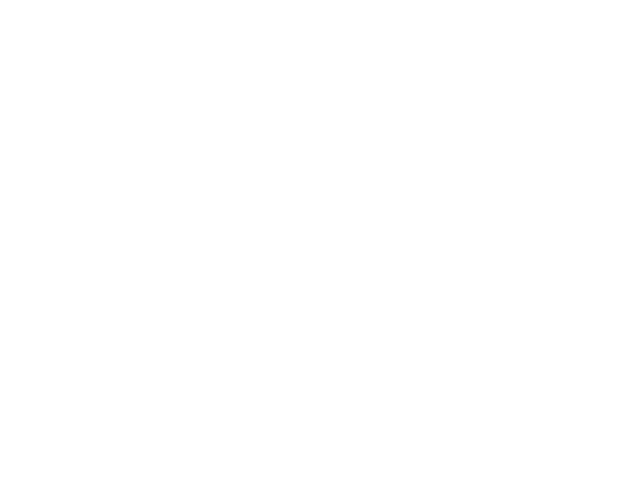

In [199]:
# Call interactiveness
widgets.interact(pf, selectedYear = year_slider, selectedRegion = CR, practice = CP, perc = area_p)

In [200]:
# Create a function takes the info on the dropdown lists (year, chosen region) and calculates the Nitrogen surplus based on the chosen practice.

def n_ifew(selectedYear, df_ifew, selectedRegion, practice, df_pract, perc):
    # create an Empty DataFrame object
    new_ifew = pd.DataFrame(index=range(3),columns=range(6))
    # Change the column names
    new_ifew.columns = ['Old', 'New', 'Max', 'Min', 'Pl', 'Helper']
    # Change the row indexes
    #new_ifew.index = ['Total Nitrogen Load [tons]', 'Corn [bushels]', 'Total Area']
        
    # Year selection
    yr = selectedYear
    df_y = df_ifew.loc[df_ifew['Year'] == yr]
    
    # Region Selection
    r = selectedRegion
    df = df_y
    if (r == 'Iowa'):
        df_r = df
    else:
        df_r = df[df['CountyName'] == r]
        
    # WHAT IF ACCOUNT FOR MULTIPLE PRACTICES?
    nr_change = df_pract.loc[df_pract['Names List']==practice,'% AVG Nitrate-N Reduction+'].item()
    cy_change = df_pract.loc[df_pract['Names List']==practice,'% Corn Yield Change++']  
    
    
    #calculate values produced by query
    if (r == 'Iowa'):
        Ns = df_r['NitrogenSurplus_kg_ha'].sum()
        Cy = df_r['CornGrainYield_bupacre'].sum()
        Nnew = Ns-((int(nr_change)/100)*Ns)
        Cnew = Cy+((int(cy_change)/100)*Cy)
    else:
        Ns = df_r['NitrogenSurplus_kg_ha']
        Cy = df_r['CornGrainYield_bupacre']
        Nnew = Ns-((int(nr_change)/100)*Ns)
        Cnew = Cy+((int(cy_change)/100)*Cy)
        
    a = Nnew
    b = Cnew  
    
    
    # total area in hectares
    total_area = (df_r['CornAcresPlanted']+df_r['SoybeansAcresPlanted'])/2.57
    
    # Nitrogen Load Old in metric tons
    new_ifew['Old'][0] = (total_area*df_r['NitrogenSurplus_kg_ha']/1000).tolist() 
    # Nitrogen Load New in metric tons
    new_ifew['New'][0] = (total_area*a/1000).tolist() 
    # Corn yield Old in bushels
    new_ifew['Old'][1] = ((df_r['CornAcresPlanted']+df_r['SoybeansAcresPlanted'])*df_r['CornGrainYield_bupacre']).tolist() 
    # Corn Yield New
    new_ifew['New'][1] = ((df_r['CornAcresPlanted']+df_r['SoybeansAcresPlanted'])*b).tolist() 
    #percentage Old
    new_ifew['Old'][2] = 100 
    
    # percentage area - which would get the new yield
    new_ifew['New'][2] = perc
    
    subset = new_ifew[['New', 'Old']]
    
    # Max column for plotting purposes
    new_ifew['Max'] = subset.max(axis=1)
    
    # Min column for plotting purposes
    new_ifew['Min'] = subset.min(axis=1)

    
    new_ifew['Pl'][0] = round(new_ifew['Max'][0][0]/(new_ifew['Max'][0][0]+new_ifew['Min'][0][0]),2)
    new_ifew['Pl'][1] = round(new_ifew['Max'][1][0]/(new_ifew['Max'][1][0]+new_ifew['Min'][1][0]),2)
    new_ifew['Pl'][2] = round(min(new_ifew['Old'][2],new_ifew['New'][2])/max(new_ifew['Old'][2],new_ifew['New'][2]),2) 
    
    new_ifew['Helper'][0] = 1-new_ifew['Pl'][0]
    new_ifew['Helper'][1] = 1-new_ifew['Pl'][1]
    new_ifew['Helper'][2] = 1-new_ifew['Pl'][2]
    
    return new_ifew

trial = (n_ifew(2015, df_ifew, 'Monroe', 'Moving from Fall to  Spring Pre-plant Application', df_pract, 50))
trial

Old                  New                  Max  \
0  [831.1906614785993]  [781.3192217898834]  [831.1906614785993]   
1         [11376000.0]         [11831040.0]         [11831040.0]   
2                  100                   50                  100   

                   Min    Pl Helper  
0  [781.3192217898834]  0.52   0.48  
1         [11376000.0]  0.51   0.49  
2                   50   0.5    0.5

In [ ]:
@interact
    con_graph(2015, df_ifew, 'Monroe', 'Moving from Fall to  Spring Pre-plant Application', df_pract, 50)


In [ ]:
def CPAP(x):
   """
   Print the current widget value in short sentence
   """
   print(f'Conservation Practice Area Percentage: {x}')
    

def CP(x):
    """
    Print the current widget value in short sentence
    """
    print(f'Chosen Conservation Practice: {x}')    

def CY(x):
    """
    Print the current widget value in short sentence
    """
    print(f'Observation Year: {x}')

def CR(x):
    """
    Print the current widget value in short sentence
    """
    print(f'Observed Region: {x}')
    
    
 
widgets.interact(CPAP, x=(0, 100,1))
widgets.interact(CY, x=(2014,2019, 1))
widgets.interact(CR, x=r_lst)
widgets.interact(CP, x=p_lst)

In [ ]:
# Update values
def update(val):
    Ef = s_Ef.val
    T = s_T.val
    f_d.set_data(x, fermi(x, Ef, T))
    fig.canvas.draw_idle()
s_Ef.on_changed(update)
s_T.on_changed(update)

In [ ]:
x = np.linspace(0, 2 * np.pi, 100)
 
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))
ax.grid(True)
 
def update(change):
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
     
int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider
